In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [192]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/auto-mpg.csv")

In [193]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [195]:
df['horsepower'].replace('?',np.nan,inplace=True)

In [196]:
df['horsepower']=df['horsepower'].astype(float)

In [197]:
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [198]:
m=df['horsepower'].median()
m

93.5

In [199]:
df['horsepower'].replace(np.nan,m,inplace=True)

In [200]:
df.shape

(398, 9)

In [201]:
d=df.duplicated()

In [202]:
d

0      False
1      False
2      False
3      False
4      False
       ...  
393    False
394    False
395    False
396    False
397    False
Length: 398, dtype: bool

In [203]:
df.drop_duplicates(inplace=True)

In [204]:
df.shape

(398, 9)

In [205]:
# outlier function

def rem_out(col):
  sorted(col)
  Q1,Q3=col.quantile([0.25,0.75])
  IQR=Q3-Q1
  l=Q1-1.5*IQR
  u=Q3+1.5*IQR
  return l,u

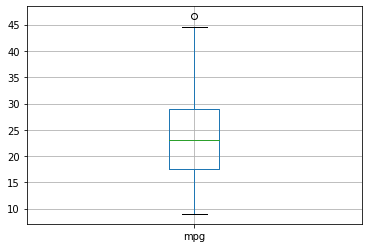

In [206]:
df.boxplot(column=['mpg'])

In [207]:
l,u=rem_out(df['mpg'])
df['mpg']=np.where(df['mpg']>u,u,df['mpg'])
df['mpg']=np.where(df['mpg']<l,l,df['mpg'])

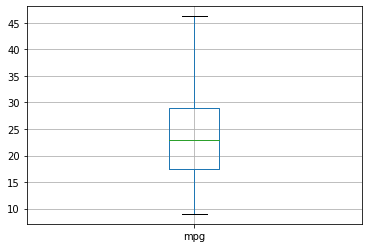

In [208]:
df.boxplot(column=['mpg'])

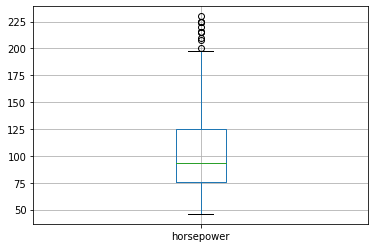

In [209]:
df.boxplot(column=['horsepower'])

In [210]:
l,u=rem_out(df['horsepower'])
df['horsepower']=np.where(df['horsepower']>u,u,df['horsepower'])
df['horsepower']=np.where(df['horsepower']<l,l,df['horsepower'])

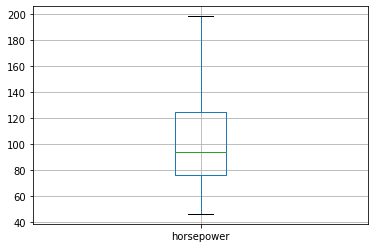

In [211]:
df.boxplot(column=['horsepower'])

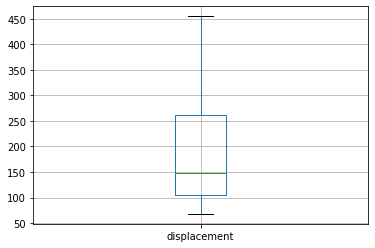

In [212]:
df.boxplot(column='displacement')

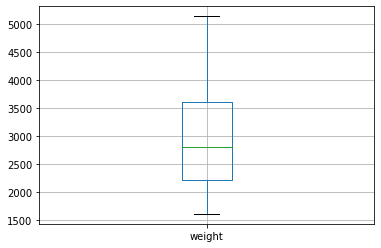

In [213]:
df.boxplot(column='weight')

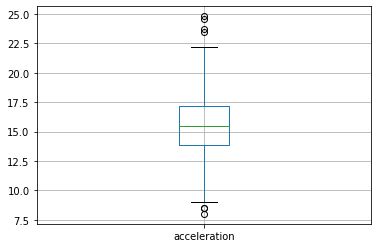

In [214]:
df.boxplot(column='acceleration')

In [215]:
l,u=rem_out(df['acceleration'])
df['acceleration|']=np.where(df['acceleration']<l,l,df['acceleration'])
df['acceleration']=np.where(df['acceleration']>u,u,df['acceleration'])


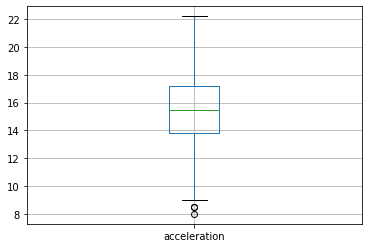

In [216]:
df.boxplot(column='acceleration')

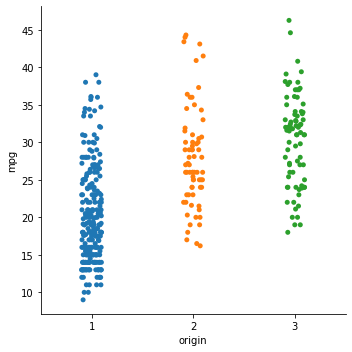

In [217]:
sns.catplot(x='origin',y='mpg',data=df)

In [218]:
# origin is catagorical

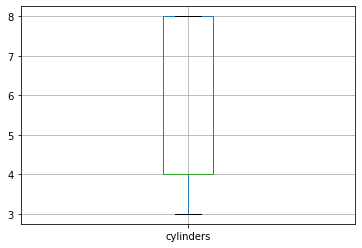

In [219]:
df.boxplot(column='cylinders')

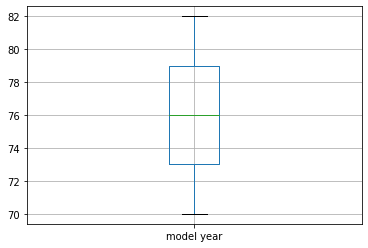

In [220]:
df.boxplot(column='model year')

In [221]:
# car name is object and not catagorical hence cannt be encoded so we just drop it

In [222]:
df.drop("car name",axis=1,inplace=True)

In [230]:
df['origin']=df['origin'].replace({1:'america',2:'europe',3:'asia'})
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,acceleration|
0,18.0,8,307.0,130.0,3504,12.0,70,america,12.0
1,15.0,8,350.0,165.0,3693,11.5,70,america,11.5
2,18.0,8,318.0,150.0,3436,11.0,70,america,11.0
3,16.0,8,304.0,150.0,3433,12.0,70,america,12.0
4,17.0,8,302.0,140.0,3449,10.5,70,america,10.5


In [231]:
dummies=pd.get_dummies(df['origin'])
dummies.head()

,america,asia,europe
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [232]:
df=pd.concat([df,dummies],axis=1)
df.drop('origin',axis=1,inplace=True)

In [234]:
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,acceleration|,america,asia,europe
0,18.0,8,307.0,130.0,3504,12.0,70,12.0,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,11.5,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,11.0,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,12.0,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,10.5,1,0,0


In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 397
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mpg            398 non-null    float64
 1   cylinders      398 non-null    int64  
 2   displacement   398 non-null    float64
 3   horsepower     398 non-null    float64
 4   weight         398 non-null    int64  
 5   acceleration   398 non-null    float64
 6   model year     398 non-null    int64  
 7   acceleration|  398 non-null    float64
 8   america        398 non-null    uint8  
 9   asia           398 non-null    uint8  
 10  europe         398 non-null    uint8  
dtypes: float64(5), int64(3), uint8(3)
memory usage: 45.3 KB


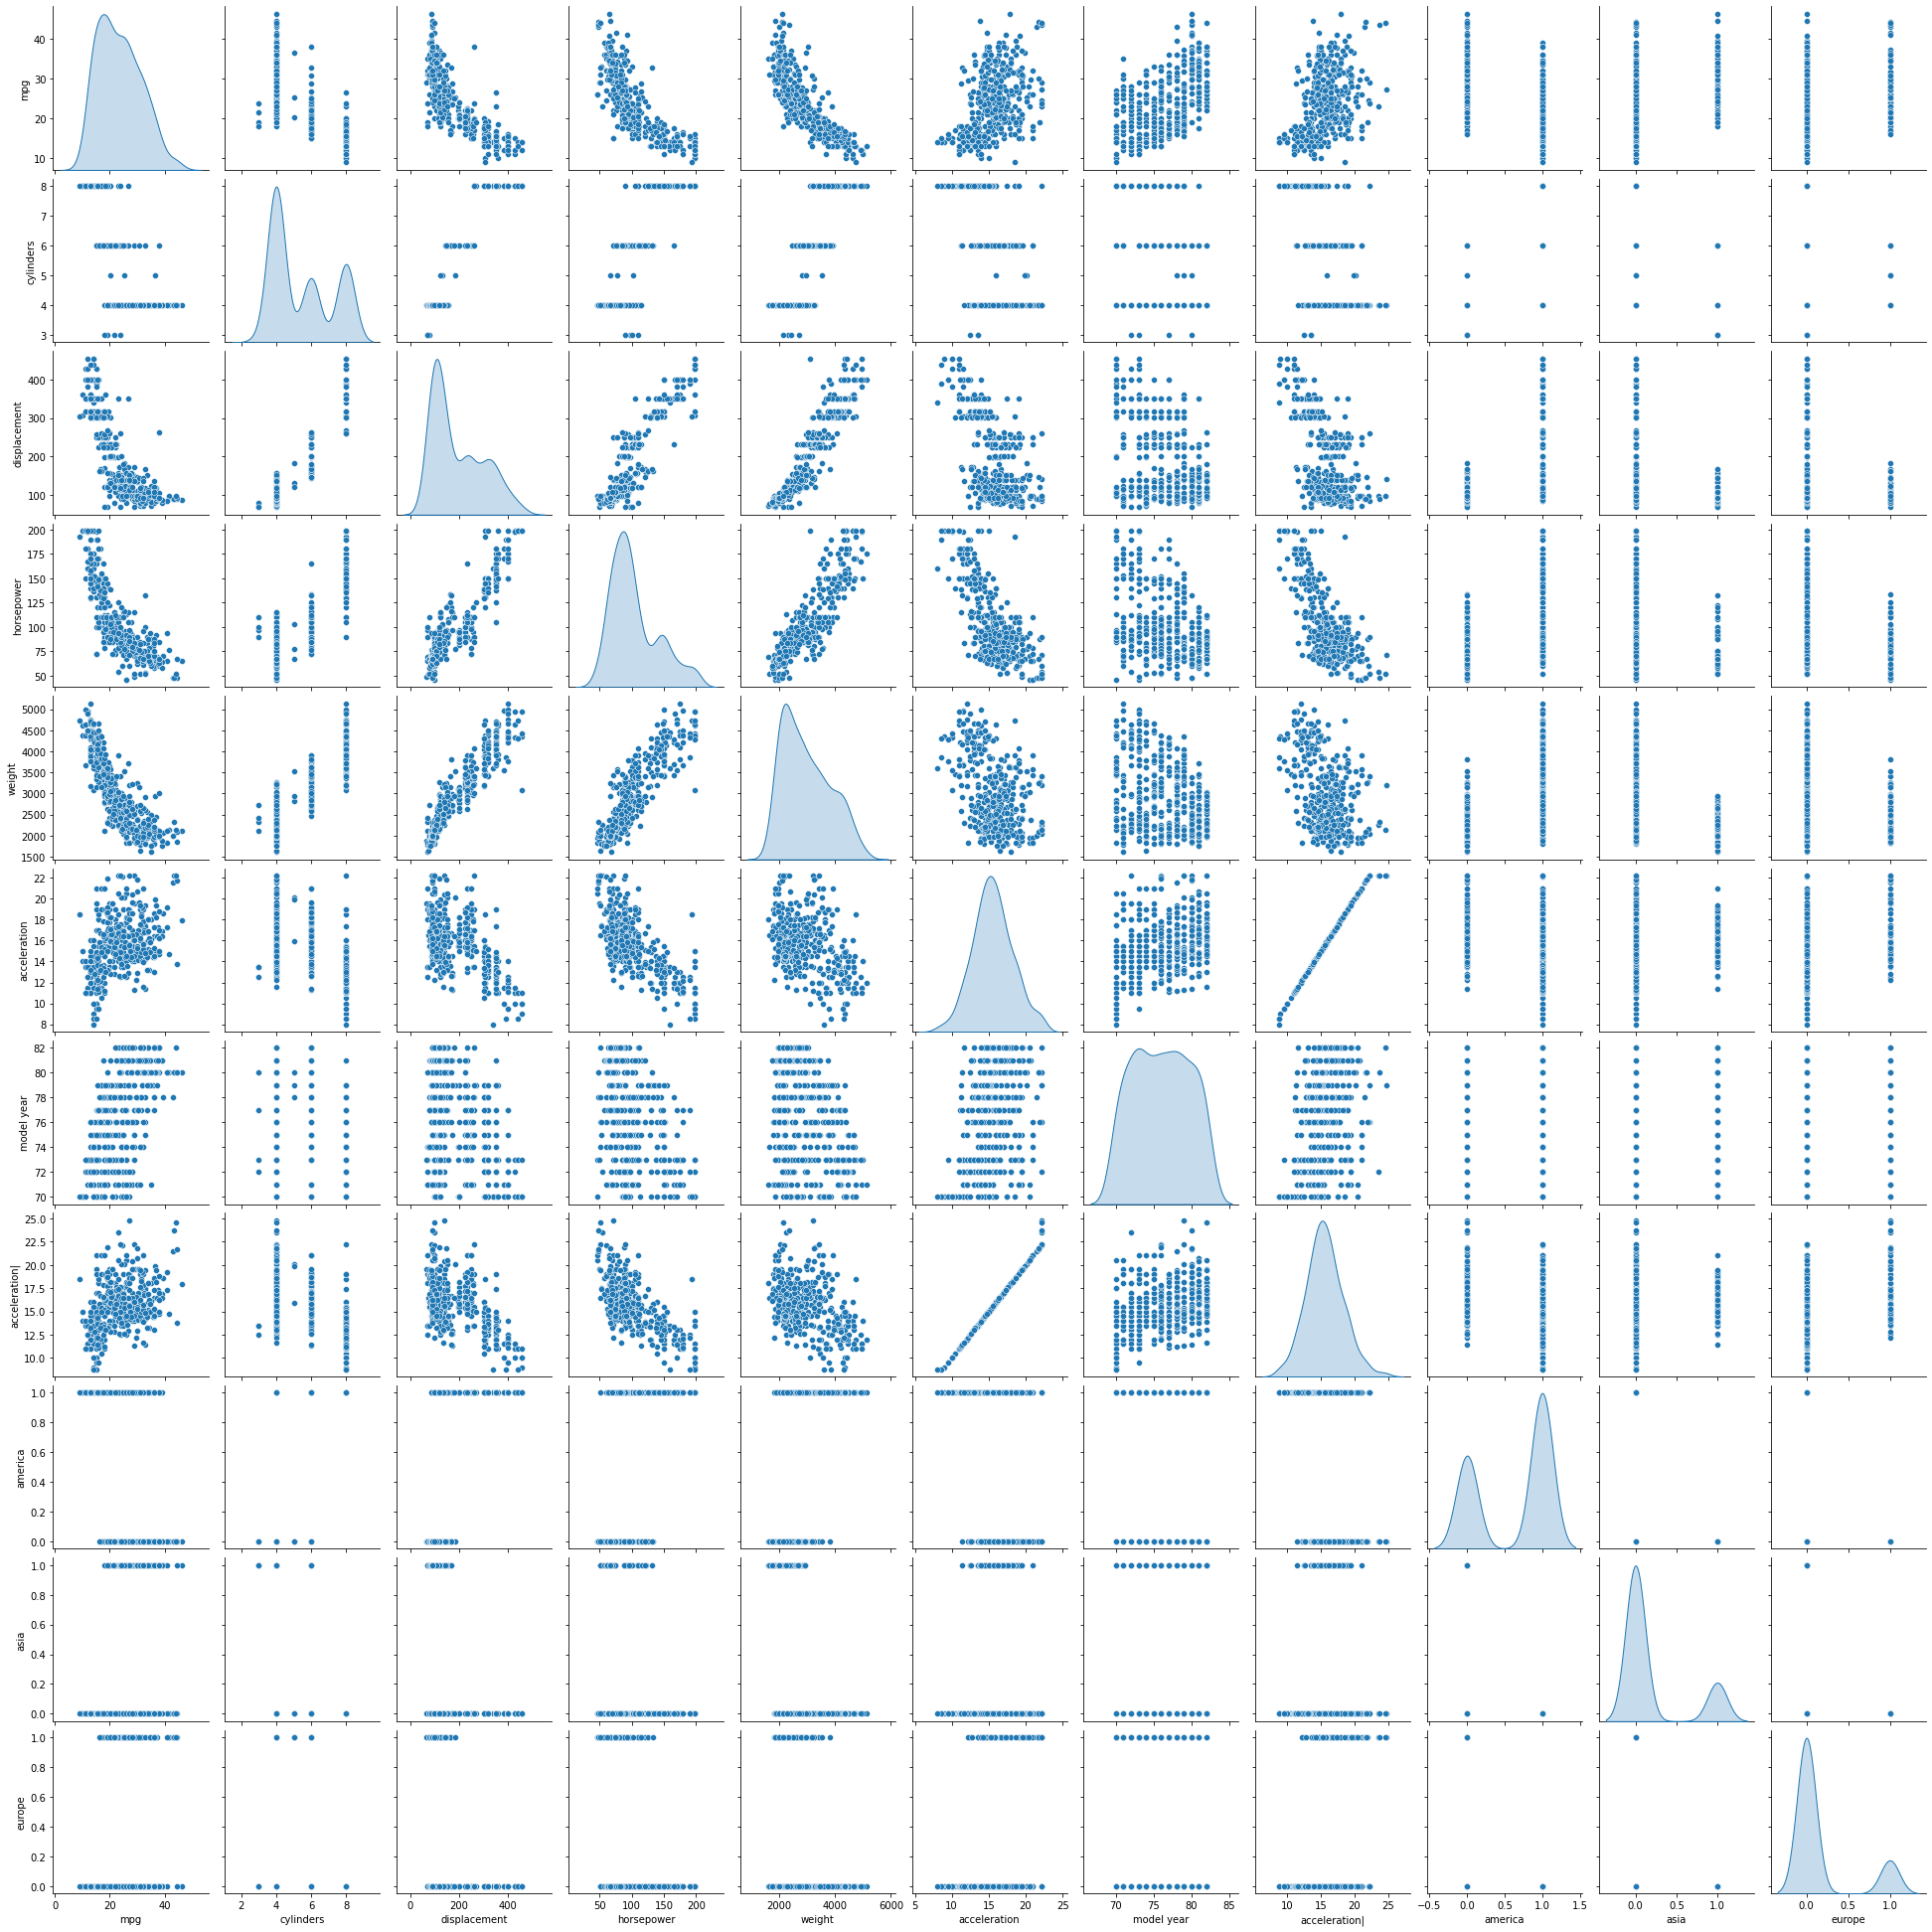

In [236]:
sns.pairplot(df,diag_kind='kde')

In [237]:
### Lets build our linear model

#independent variables
x=df.drop(['mpg'],axis=1)

#dependent variables 

y=df['mpg']

In [238]:
#### split x and y into training and test data in the ratio of 70%:30%

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [239]:
model1 = LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [240]:
model1.score(x_train,y_train)

0.8182817889542335

In [241]:
model1.score(x_test,y_test)

0.8288739762623528

In [243]:
# got difference between test score and train score less than 5%